<a href="https://colab.research.google.com/github/franco-balich/red-neuronal-test/blob/main/red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

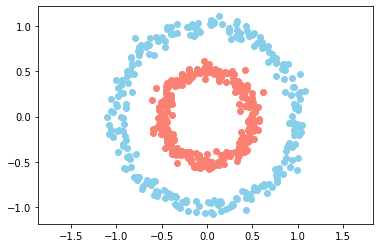

In [12]:
# Crear el dataset

n = 500
p=2

X,Y=make_circles(n_samples=n,factor=0.5, noise=0.05)

plt.scatter(X[Y==0,0],X[Y==0,1],c="skyblue")
plt.scatter(X[Y==1,0],X[Y==1,1],c="salmon")
plt.axis("equal")
plt.show()

In [13]:
# Clase de la capa de la red

class neural_layer():

  def __init__(self,n_conn,n_neur,act_f):
    self.act_f = act_f
    self.b=np.random.rand(1,n_neur)     *2-1
    self.w=np.random.rand(n_conn,n_neur)*2-1

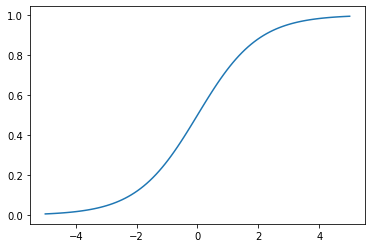

In [19]:
# Funciones de activacion

sigm = (lambda x:1/(1+np.e**(-x)),
        lambda x: x*(1-x))

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))


In [21]:
l0 = neural_layer(p,4,sigm)
l1 = neural_layer(4,8,sigm)
#...

def create_nn(topology,act_f):
  nn=[]
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn


In [34]:
topology=[p,4,8,16,8,4,1]

neural_net=create_nn(topology,sigm)

l2_cost= (lambda Yp,Yr:np.mean((Yp-Yr)**2),
          lambda Yp,Yr:(Yp-Yr))

def train(neural_net, X, Y, l2_cost,lr=0.5,train=true):

  out = [(None,X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    z= out[-1][1] @ neural_net[l].w + neural_net[l].b
    a=neural_net[0].act_f[0](z)

    out.append((z,a))

  print(l2_cost[0](out[-1][1],Y))

  if train:

    #Backwad pass

    #Gradient descent

train(neural_net,X,Y,l2_cost,0.5)

0.26066491170877604
